# Setup environtment

In [ ]:
#Import library we are going to use
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [ ]:
#reading the dataset
df = pd.read_csv('/content/boston.csv', sep=None, engine="python")
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
427,37.66190,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281,19.0,396.90,6.72,24.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# Check dataset

In [ ]:
#to give the glimpse of information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


based on information above, i don't see missing values. there are 13 columns and 506 rows.

Detail information about column:

1.crim = Per capita crime rate menurut kota (tingkat kriminalitas per orang). Semakin tinggi → area lebih rawan.

2.zn = Persentase lahan pemukiman yang di-zone untuk rumah besar (lot > 25.000 sq.ft). Semakin tinggi → kawasan lebih “elit/suburban”.

3.indus =	Persentase area bisnis non-ritel per kota (kepadatan industri). Tinggi → area lebih industrial.
chas	Dummy variabel: 1 jika lokasi berbatasan dengan Sungai Charles, 0 jika tidak.

4.nox =	Konsentrasi oksida nitrogen (NOx) di udara (dalam bagian per 10 juta). Indikator polusi udara.

5.rm =	Rata-rata jumlah kamar per rumah. Semakin besar → rumah lebih besar.

6.age =	Persentase unit hunian yang dibangun sebelum tahun tertentu (tua/mudanya bangunan). Umumnya % rumah tua.

7.dis =	Jarak tertimbang ke pusat kota/pekerjaan utama di Boston. Angka besar → lebih jauh ke pusat.

8.rad =	Indeks aksesibilitas ke jalan raya utama (radial highway). Semakin besar → akses tol/jalan besar lebih mudah.

9.tax =	Tarif pajak properti per $10.000 (property tax rate).

10.ptratio =	Pupil-teacher ratio di sekolah kota tersebut (jumlah murid per guru). Kecil → sekolah cenderung lebih baik.

11.black =	1000(Bk − 0.63)², di mana Bk adalah proporsi penduduk kulit hitam (cara lama mengode ras di dataset ini).

12.lstat =	Persentase penduduk berstatus sosial ekonomi rendah (lower status population).

13.medv =	Median nilai rumah yang dimiliki penduduk (dalam ribuan dolar). Ini biasanya jadi target (y).

# Check duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

there is no duplicates

# Check missing value

In [ ]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


There is no missing value

# Check Outliers

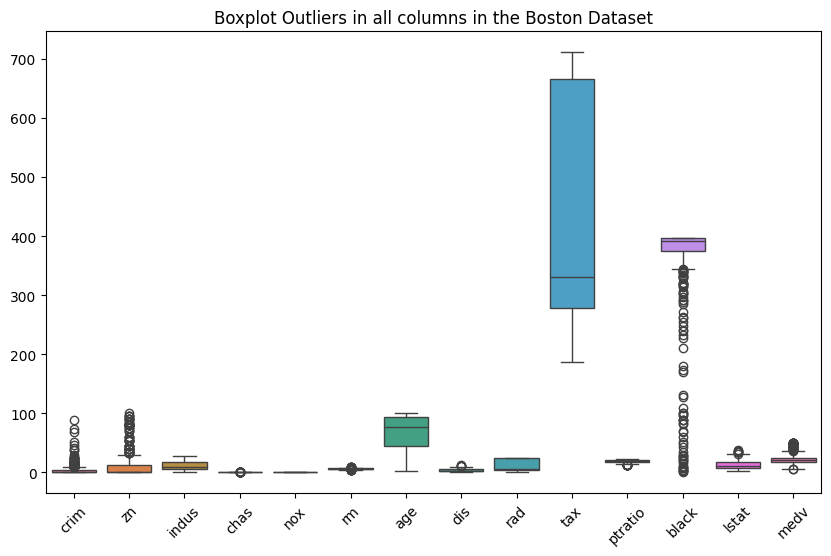

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot Outliers in all columns in the Boston Dataset")
plt.show()

so many outliers in this dataset, especially in the columns crim, zn, and black.

we avoide to remove outliers because we don't wan't to lose important information from the dataset. we leave outliers as it is.

# Split Train Test

In [ ]:
#drop column medv from X to avoid data leakage
X = df.drop(columns=['medv'])
y = df['medv']

# 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split temp into 15% val and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(354, 13) (76, 13) (76, 13)


In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.731586
2,zn,2.394452
3,indus,3.836487
4,chas,1.102642
5,nox,4.627219
6,rm,1.913056
7,age,2.996110
8,dis,3.971023
9,rad,7.534681
10,tax,8.879471


There are several features with high VIF scores:

1.`tax`
2.`rad`
3.`indus`
4.`nox`

# Correlation Matrix (Train Only) + Feature Selection

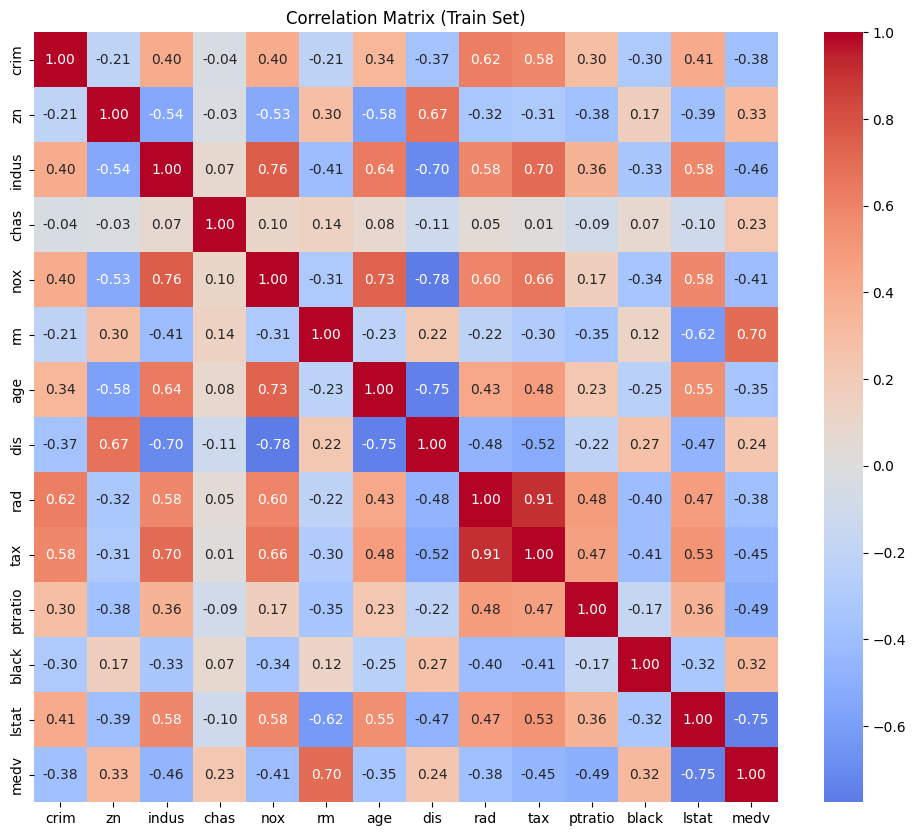

In [ ]:
#correlation matrix
train_corr = X_train.join(y_train).corr()

plt.figure(figsize=(12, 10)) #size 12,10
sns.heatmap(
    train_corr,
    annot=True,          # show the correlation numbers
    fmt=".2f",           # format to 2 decimal places
    cmap='coolwarm',
    center=0
)
plt.title("Correlation Matrix (Train Set)")
plt.show()

**insight**

1.**tax and rad** has strong correlation (0.91). **i consider to drop tax** because tax is more of an administrative variable and tends to be a proxy for the same geographical structure captured by rad

2.**indus and nox**, These two have a very strong correlation (0.76). **i consider to drop indus** because indus is an indirect structural variable and often redundant when nox is present.

3.**age** has strong correlation with **nox (0.73) and dis(0.75)**. Older homes tend to cluster in polluted, industrial, centrally located areas, these information already captured by other features. so i **drop age column**

In [ ]:
# drop tax, indus and age column
X_train_sel = X_train.drop(columns=['tax', 'indus', 'age'])
X_val_sel = X_val.drop(columns=['tax', 'indus', 'age'])
X_test_sel = X_test.drop(columns=['tax', 'indus', 'age'])

# Recheck VIF

In [ ]:
# recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_sel)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.728471
2,zn,2.150366
3,chas,1.082500
4,nox,3.704987
5,rm,1.780944
6,dis,3.466538
7,rad,2.825617
8,ptratio,1.745760
9,black,1.256779
10,lstat,2.480202


# Model Training (Ridge & LASSO) + Lambda Selection

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error #to compute RMSE on the validation set.

lambdas = [0.01, 0.1, 1, 10]

ridge_results = []
lasso_results = []

#These lists will store pairs of (lambda, validation_RMSE)

# Ridge validation loop

In [ ]:
#Loop through each regularization strength (lambda)
for lam in lambdas:
    model = make_pipeline(StandardScaler(), Ridge(alpha=lam, random_state=42)) #Create a pipeline with scaling + Ridge regression
    model.fit(X_train_sel, y_train) #Fit the model on the training set
    y_val_pred = model.predict(X_val_sel) #Predict on the validation set
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred)) #Compute RMSE on validation data
    ridge_results.append((lam, rmse)) #Store the lambda–RMSE pair

print("Ridge (lambda, RMSE):", ridge_results)

Ridge (lambda, RMSE): [(0.01, np.float64(4.147043935241207)), (0.1, np.float64(4.147061433937125)), (1, np.float64(4.147275729604332)), (10, np.float64(4.152384913010438))]


# Lasso validation loop

In [ ]:
#Looping through each lambda value
for lam in lambdas:
    model = make_pipeline(StandardScaler(), Lasso(alpha=lam, random_state=42, max_iter=10000)) #Create a pipeline with scaling + Lasso regression
    model.fit(X_train_sel, y_train) #Fit the model on the training set
    y_val_pred = model.predict(X_val_sel) #Predict on the validation set
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred)) #Compute RMSE on validation data
    lasso_results.append((lam, rmse)) #Store the lambda–RMSE pair

print("LASSO (lambda, RMSE):", lasso_results)

LASSO (lambda, RMSE): [(0.01, np.float64(4.14946380997602)), (0.1, np.float64(4.201548558942403)), (1, np.float64(4.36631863380951)), (10, np.float64(8.431342091408773))]


# Select best lambda

In [ ]:
#Selecting the best lambda for Ridge and Lasso regression
best_ridge_lambda, best_ridge_rmse = min(ridge_results, key=lambda x: x[1])
best_lasso_lambda, best_lasso_rmse = min(lasso_results, key=lambda x: x[1])

print("Best Ridge:", best_ridge_lambda, best_ridge_rmse)
print("Best LASSO:", best_lasso_lambda, best_lasso_rmse)

Best Ridge: 0.01 4.147043935241207
Best LASSO: 0.01 4.14946380997602


# Train the Best Model on (Train + Validation) & Interpret Coefficients

In [ ]:
#merges the training and validation datasets into a single, larger training dataset.
X_train_full = pd.concat([X_train_sel, X_val_sel], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

In [ ]:
#Creating the Final Model Pipeline
best_model = make_pipeline(
    StandardScaler(),
    Lasso(alpha=best_lasso_lambda, random_state=42, max_iter=10000)
)

best_model.fit(X_train_full, y_train_full)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, max_iter=10000, random_state=42))])

In [ ]:
#Get the LASSO model’s coefficients
coef_values = best_model.named_steps['lasso'].coef_
feature_names = X_train_sel.columns

for name, coef in zip(feature_names, coef_values): #Print each feature with its coefficient
    print(f"{name}: {coef:.4f}")

print("Intercept:", best_model.named_steps['lasso'].intercept_)

crim: -0.9505
zn: 0.5637
chas: 0.7844
nox: -2.2091
rm: 3.1618
dis: -2.6851
rad: 1.1014
ptratio: -2.1877
black: 0.8310
lstat: -3.5647
Intercept: 22.78418604651163


In [ ]:
#Calculate all evaluation metrics
from sklearn.metrics import mean_absolute_error

y_test_pred = best_model.predict(X_test_sel)

# Metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

mape_value = mape(y_test, y_test_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape_value)

MAE : 3.4490884039857383
RMSE: 5.262589985413011
MAPE: 18.463547023841436


**Insight**

**MAE** = 3.449 On average, predictions are off by $3,449.

**RMSE** = 5.26 Larger errors exist, meaning some houses are mispredicted by around 5 K.

**MAPE** = 18.46 On average, the model is 18.46% off from the true price.


# Conclusion

**1.Most influential features on housing prices (MEDV)
Based on the Ridge and Lasso coefficients, the main drivers are:**

Strong positive effects:

rm (3.1618) = More average rooms strongly increases house prices.

rad (1.1014) = Better access to radial highways increases property value.

chas (0.7844) = Properties near the Charles River are priced higher.

black (0.8310) = Shows a positive association (interpretation is historical and context-dependent).

Strong negative effects:

lstat (-3.5647) = Higher proportion of lower-income residents strongly reduces house prices (largest impact).

dis (-2.6851) = Greater distance from employment centers lowers prices.

nox (-2.2091) = Higher air pollution is associated with lower property values.

ptratio (-2.1877) = Higher pupil–teacher ratios (lower school quality) reduce prices.

crim (-0.9505) = High crime rates decrease housing values.

These relationships align well with economic and urban housing literature.


**2.Model stability (Ridge vs Lasso)**

Best Ridge RMSE: 4.1470

Best Lasso RMSE: 4.1494

The performance difference is minimal, indicating that the model is stable under regularization.

**3.overall model performance**

**MAE** = 3.449 On average, predictions are off by $3,449.

**RMSE** = 5.26 Larger errors exist, meaning some houses are mispredicted by around 5 K.

**MAPE** = 18.46 On average, the model is 18.46% off from the true price.


# Recommendation

**1.Address remaining non-linearity with ensemble models**

The Boston dataset contains many non-linear relationships.
Models such as Random Forest, Gradient Boosting, or XGBoost will likely reduce RMSE further.

**2.Improve preprocessing for skewed features**
Several features are heavily skewed (e.g., crim, zn, black).
Applying: **log transformation, and RobustScaler**